## RNN
### Bitcoin prediction using LSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

# coindesk(1 year bitcoin price)
f=open("BTC_USD_2021-02-03_2022-02-02-CoinDesk.csv","r")

Saving BTC_USD_2021-02-03_2022-02-02-CoinDesk.csv to BTC_USD_2021-02-03_2022-02-02-CoinDesk (2).csv


In [ ]:
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # closing price

In [ ]:
# sequential data를 window 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # window 크기
h=1 # horizon 계수

X,Y=seq2dataset(seq,w,h)

In [ ]:
import sys
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

print("tensorflow version: ", tf.__version__)
print("python version: ", sys.version)

tensorflow version:  2.8.0
python version:  3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


In [ ]:
# training set과 test set으로 split
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [ ]:
# LSTM model
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 6s - loss: 9261.8174 - mae: 9261.8174 - val_loss: 2231.7151 - val_mae: 2231.7151 - 6s/epoch - 23ms/step
Epoch 2/200
250/250 - 2s - loss: 3412.3081 - mae: 3412.3081 - val_loss: 4486.0044 - val_mae: 4486.0044 - 2s/epoch - 8ms/step
Epoch 3/200
250/250 - 2s - loss: 3308.0073 - mae: 3308.0073 - val_loss: 2198.5073 - val_mae: 2198.5073 - 2s/epoch - 9ms/step
Epoch 4/200
250/250 - 2s - loss: 3237.4062 - mae: 3237.4062 - val_loss: 2029.3058 - val_mae: 2029.3058 - 2s/epoch - 9ms/step
Epoch 5/200
250/250 - 2s - loss: 3122.7852 - mae: 3122.7852 - val_loss: 3270.1301 - val_mae: 3270.1301 - 2s/epoch - 9ms/step
Epoch 6/200
250/250 - 2s - loss: 2969.5295 - mae: 2969.5295 - val_loss: 2500.1238 - val_mae: 2500.1238 - 2s/epoch - 9ms/step
Epoch 7/200
250/250 - 2s - loss: 3103.0684 - mae: 3103.0684 - val_loss: 2632.0286 - val_mae: 2632.0286 - 2s/epoch - 9ms/step
Epoch 8/200
250/250 - 2s - loss: 3313.6255 - mae: 3313.6255 - val_loss: 2098.2400 - val_mae: 2098.2400 - 2s/epoch - 9ms/step

In [ ]:
# LSTM model evaluation
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

손실 함수: 1255.1478271484375 MAE: 1255.1478271484375


In [ ]:
# LSTM model prediction
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

평균절댓값백분율오차(MAPE): [0.02415612]


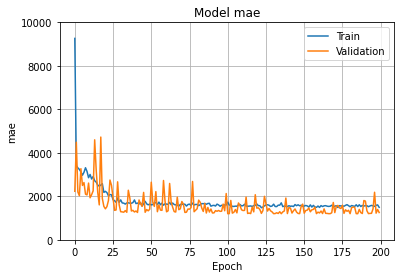

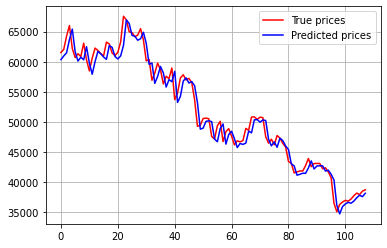

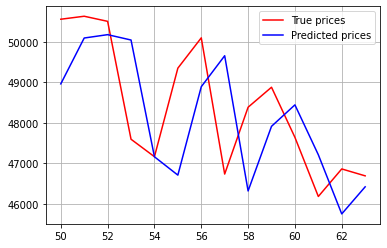

In [ ]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([0,10000])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# visualization
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

# visualizate some section
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()